# Supervised Learning: Classification

In [ ]:
# The goal is to use a classification algorithm to detect skin cancer

## Import libraries

*   [Pandas](https://pandas.pydata.org/docs/getting_started/index.html#intro-to-pandas) provides data structures to work with relational (tabular) data.
*   [NumPy](https://numpy.org/) provides numerical computing tools (mathematical functions, linear algebra routines, etc.)
*   [Matplotlib](https://matplotlib.org/) allows to create visualizations.
*   [Seaborn](https://seaborn.pydata.org/) is based on Matplotlib. It provides a high-level interface for drawing graphics.
*   [scikit-learn](https://scikit-learn.org/) is a Python package for Machine Learning. It contains a lot of modules. Only those that are needed will be imported later in the code.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# some settings for displaying data and for graphics
pd.set_option('display.max_columns', None)
sns.set_style("dark")
sns.set(rc={'figure.figsize':(12,4)})

## Import data

scikit-learn comes with a few small standard datasets that do not require to download any file from some external website. In this lab the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset) will be used. It is loaded using [load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) function.

The dataset contains 30 numeric, predictive attributes and the class for `569` patients.

**Features**:

*   `radius` (mean of distances from center to points on the perimeter)
*   `texture` (standard deviation of gray-scale values)
*   `perimeter`
*   `area`
*   `smoothness` (local variation in radius lengths)
*   `compactness` (perimeter^2 / area - 1.0)
*   `concavity` (severity of concave portions of the contour)
*   `concave points` (number of concave portions of the contour)
*   `symmetry`
*   `fractal dimension` ("coastline approximation" - 1)

The `mean`, `standard error`, and `worst` or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features. For instance, field 0 is Mean Radius, field 10 is Radius SE, field 20 is Worst Radius.

**Class**:

*   `WDBC-Malignant`
*   `WDBC-Benign`

In [ ]:
from sklearn.datasets import load_breast_cancer

# Load data: feature variables (X) and target variable (y)
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

# Display first lines
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [ ]:
# names of classes will be used for visualizations
target_names = {0: 'malignant', 1: 'benign'}
y_with_names = y.map(target_names)

In [ ]:
X.shape, y.shape

((569, 30), (569,))

There are 569 objects in total.

In [ ]:
# Display features along with the target
pd.concat([X,y_with_names], axis=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


## Exploratory Data Analysis

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

All the features are numerical.

Get some statistics on the features.

In [ ]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Check if there are missing values.

In [ ]:
X.isna().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
dtype: boo

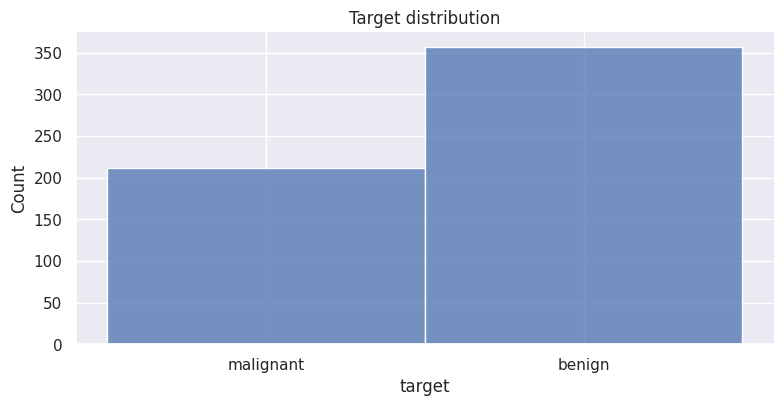

In [ ]:
# Plot the target distribution
sns.displot(y_with_names, height=4, aspect=2)
plt.title("Target distribution");

It's a **binary classification problem** - predicting one of the two classes (`malignant` or `benign`) by the values of (30) independent variables.

### Distribution of numerical features

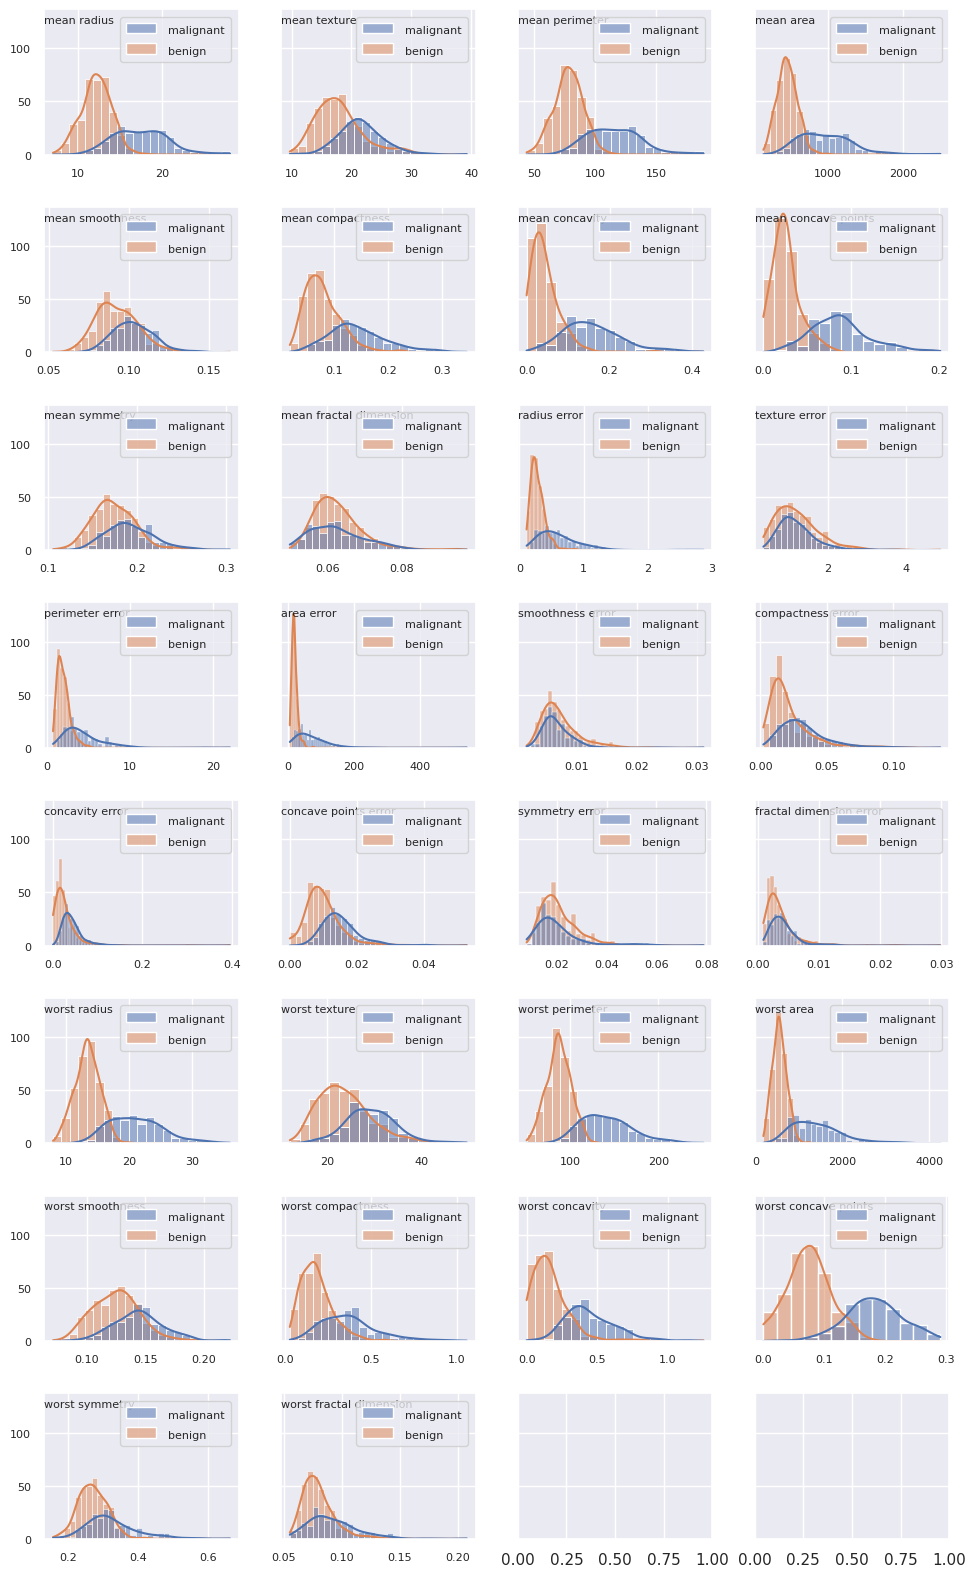

In [ ]:
import math

n = len(X.columns)
ncols = 4
nrows = math.ceil(n/ncols)
# add a grid for graphics
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, figsize = (10,16))
fig.tight_layout()

for k in range(n):
    i = math.floor(k/ncols)
    j = k % ncols
    # add histograms for visualizing the distribution of k-th feature's values:
    # separately for different values of the target (different classes)
    g = sns.histplot(x=X[X.columns[k]], ax=axs[i,j], hue=y_with_names, kde=True)
    # remove legend title
    g.get_legend().set_title('')
    # change the fontsize of the legend
    plt.setp(g.get_legend().get_texts(), fontsize='8')
    # change the fontsize of the ticks for x and y axis
    plt.setp(g.get_xticklabels(), fontsize='8')
    plt.setp(g.get_yticklabels(), fontsize='8')
    # remove titles for x and y axis
    axs[i,j].set_xlabel('')
    axs[i,j].set_ylabel('')
    # set graphic title and its location
    axs[i,j].set_title(X.columns[k], loc='left', fontsize=8, pad=-10)

Check correlation between feature variables and the target.

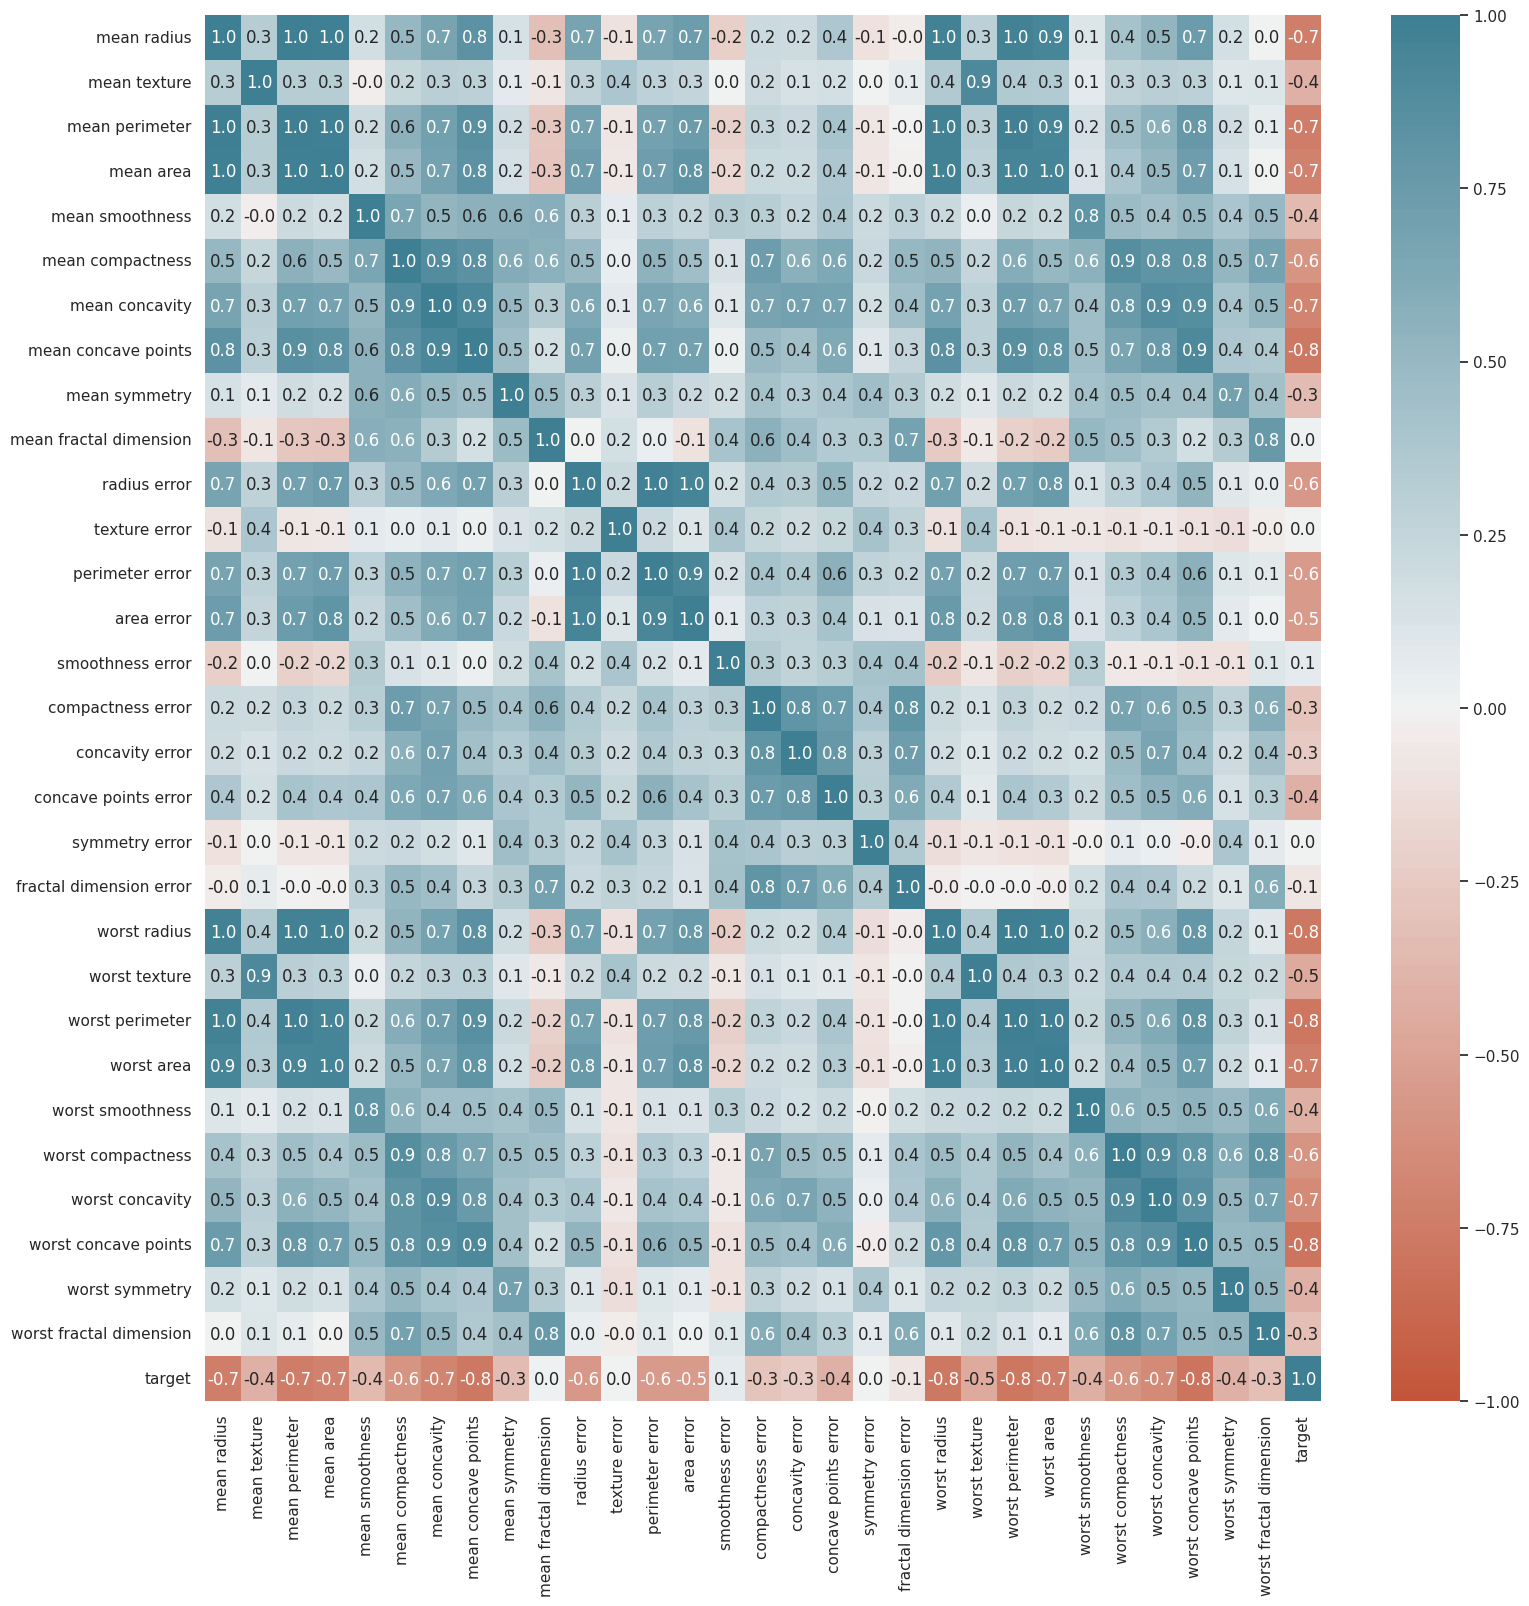

In [ ]:
cmap_corr = sns.diverging_palette(20, 220, n=200)
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(pd.concat([X,y], axis=1).corr(), cmap=cmap_corr, vmin=-1, vmax=1, annot=True, fmt='.1f', ax=ax);

## Modeling

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Splitting data

Split data on train and test subsets. It is done in a random way. If you want to be able to reproduce the results of your code, you need to fix the value of the `random_state` argument.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


### Logistic Regression

[Logistic regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) is a linear model for binary classification. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a [logistic function](https://en.wikipedia.org/wiki/Logistic_function).

The prediction formula is: $a(x) = sign(w_0 + w_1 \times x_1 + ... + w_d \times x_d) = sign(w,x)$

*   if $(w,x) > 0$, then $a(x) = sign(w,x) = +1$ and the predicted class for the object $x$ is **positive**
*   if $(w,x) < 0$, then $a(x) = sign(w,x) = -1$ and the predicted class for the object $x$ is **negative**


#### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_processed = pd.DataFrame(scaler.transform(X_train), columns=scaler.get_feature_names_out())
X_test_processed = pd.DataFrame(scaler.transform(X_test), columns=scaler.get_feature_names_out())

#### Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a class instance
clf_lr = LogisticRegression()

# Train the model using train data
clf_lr.fit(X_train_processed, y_train);

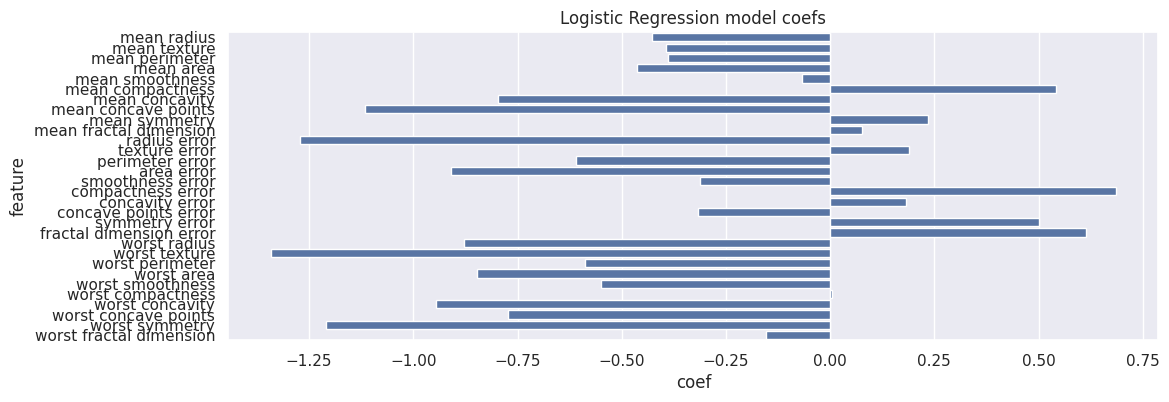

In [ ]:
coef_ = pd.DataFrame({'feature': clf_lr.feature_names_in_, 'coef': clf_lr.coef_[0]})
sns.barplot(data=coef_, y='feature', x='coef', color='b')
plt.title('Logistic Regression model coefs');


#### Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score

# Make predictions
y_pred = clf_lr.predict(X_test_processed)
y_pred_probas = clf_lr.predict_proba(X_test_processed)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1:.2f}")

roc_auc = roc_auc_score(y_test, y_pred_probas)
print(f"ROC-AUC score: {f1:.2f}")

Accuracy: 0.97
F1 score: 0.98
ROC-AUC score: 0.98


Accuracy is of 97%. There are just 3% of wrong predictions.

#### Confusion matrix

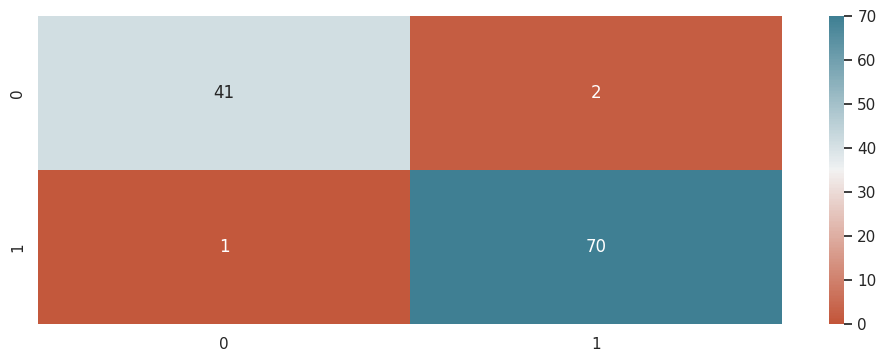

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap=cmap_corr, vmin=0, annot=True, fmt='d');

Rows correspond to actual classes, and columns - to predicted classes.
*   The count of true negatives is `41`
*   The count of false negatives is `1`
*   The count of true positives is `70`
*   The count of false positives is `2`

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(41, 2, 1, 70)

#### ROC-curve

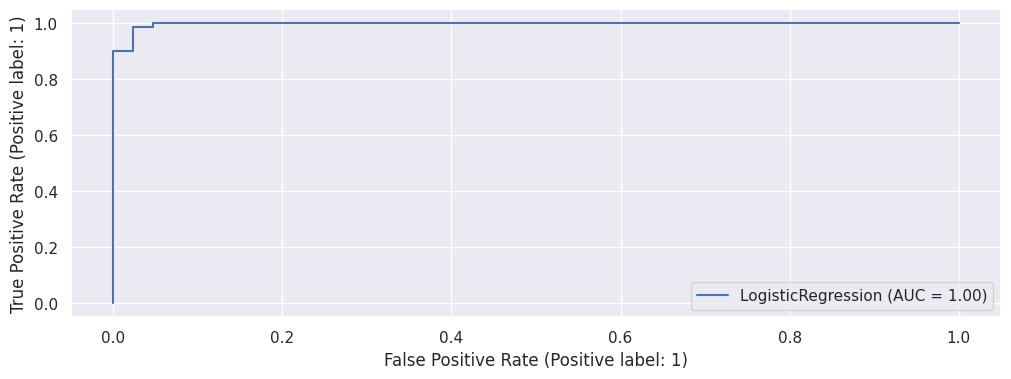

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf_lr, X_test_processed, y_test);

#### Predicting probabilities

In [ ]:
# Make predictions
y_pred = clf_lr.predict(X_test_processed)
y_pred_probas = np.round(clf_lr.predict_proba(X_test_processed),2)

pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred, name='prediction'), pd.DataFrame(y_pred_probas)], axis=1)

,target,prediction,0,1
0,1,1,0.11,0.89
1,0,0,1.00,0.00
2,0,0,1.00,0.00
3,1,1,0.00,1.00
4,1,1,0.00,1.00
...,...,...,...,...
109,1,1,0.03,0.97
110,0,0,1.00,0.00
111,1,1,0.00,1.00
112,1,0,0.54,0.46


#### Changing threshold for probabilities

In [ ]:
LR_THRESHOLD = 0.75

# Make predictions (the second column of the probabilities matrix correspond to the positive class)
y_pred_probas = clf_lr.predict_proba(X_test_processed)[:,1]
y_pred = (y_pred_probas > LR_THRESHOLD).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

roc_auc = roc_auc_score(y_test, y_pred_probas)
print(f"ROC-AUC score: {f1:.2f}")

Accuracy: 0.96
ROC-AUC score: 0.98


Score values have decreased slightly but still are high.

### Decision Tree

[Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) is a non-parametric supervised learning method used for classification. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

#### Modeling

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a class instance
clf_dt = DecisionTreeClassifier()

# Train the model using train data
clf_dt.fit(X_train, y_train);

#### Evaluation

In [ ]:
# Make predictions
y_pred = clf_dt.predict(X_test)
y_pred_probas = clf_dt.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1:.2f}")

roc_auc = roc_auc_score(y_test, y_pred_probas)
print(f"ROC-AUC score: {f1:.2f}")

Accuracy: 0.94
F1 score: 0.95
ROC-AUC score: 0.95


#### Visualization

In [ ]:
from sklearn.tree import export_text

clf_dt_text = export_text(clf_dt)
print(clf_dt_text)

|--- feature_7 <= 0.05
|   |--- feature_20 <= 16.83
|   |   |--- feature_10 <= 0.63
|   |   |   |--- feature_24 <= 0.18
|   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |--- feature_19 <= 0.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_19 >  0.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |--- feature_21 <= 33.35
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  33.35
|   |   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_24 >  0.18
|   |   |   |   |--- class: 0
|   |   |--- feature_10 >  0.63
|   |   |   |--- feature_7 <= 0.03
|   |   |   |   |--- class: 1
|   |   |   |--- feature_7 >  0.03
|   |   |   |   |--- class: 0
|   |--- feature_20 >  16.83
|   |   |--- feature_1 <= 16.19
|   |   |   |--- class: 1
|   |   |--

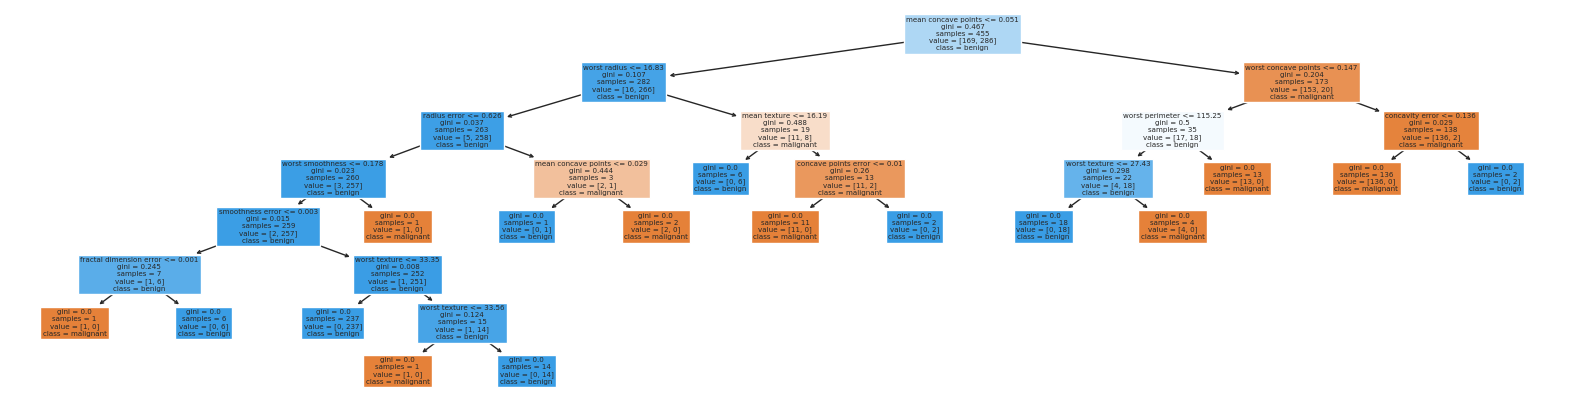

In [ ]:
from sklearn.tree import plot_tree

class_names = [x for x in target_names.values()]

fig = plt.figure(figsize=(20,5))
plot_tree(clf_dt, feature_names=X.columns, class_names=class_names, filled=True);

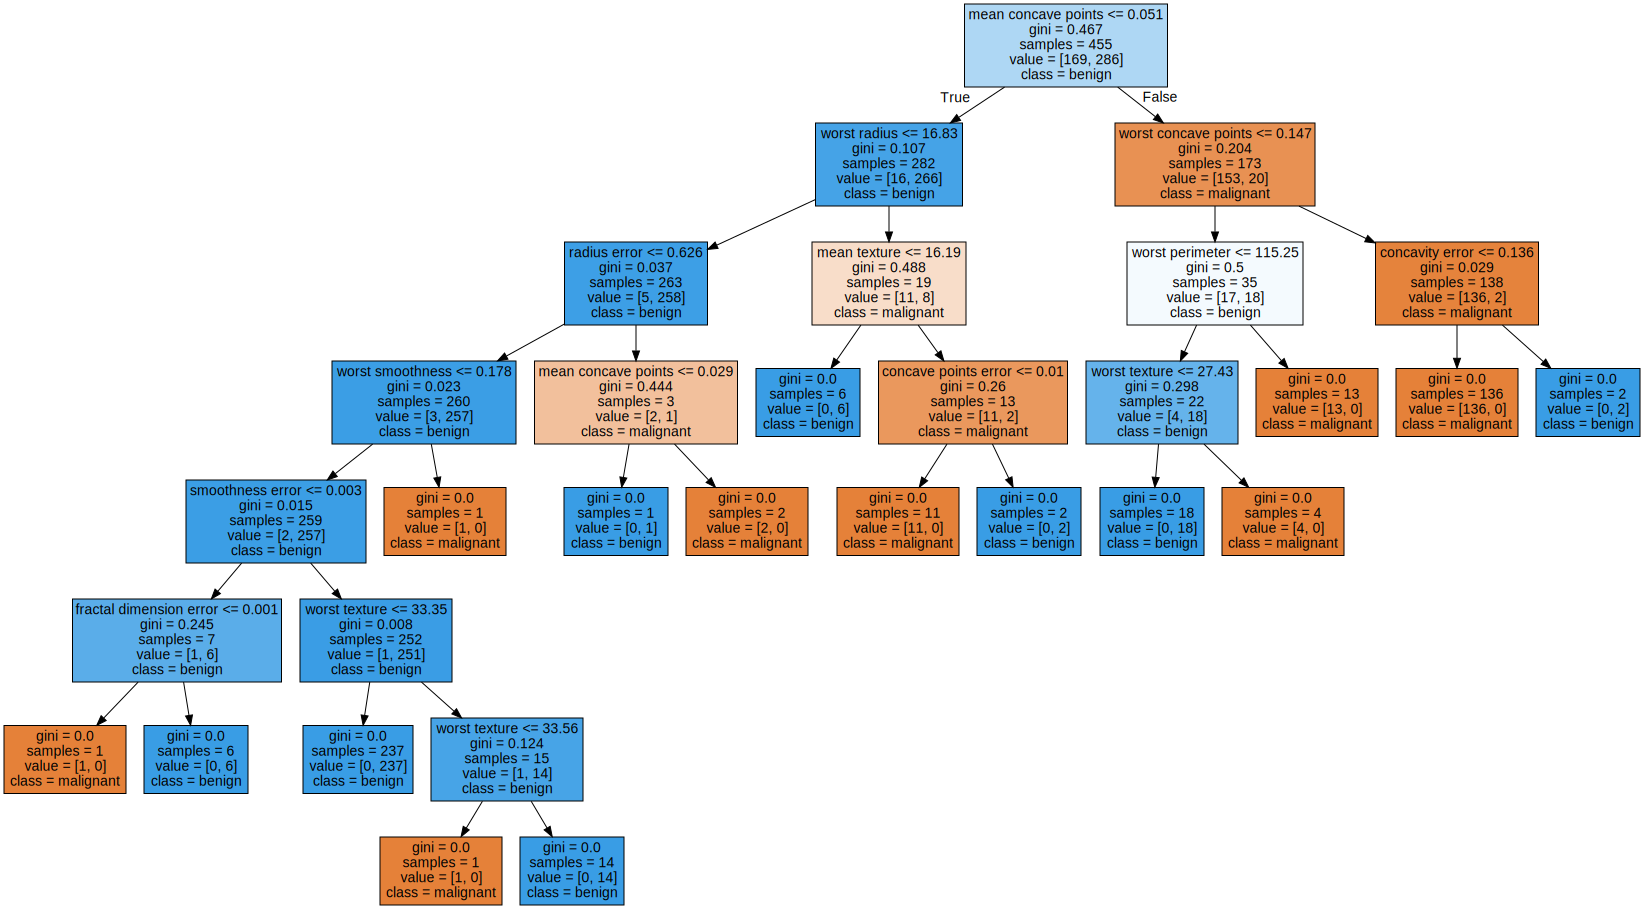

In [ ]:
import graphviz
from sklearn.tree import export_graphviz


# DOT data
dot_data = export_graphviz(clf_dt, out_file=None, feature_names=X.columns, class_names=class_names, filled=True)

# Draw graph
clf_dt_graph = graphviz.Source(dot_data, format="png")
clf_dt_graph